In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Chocolate_Sales.csv')
df.head()


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [2]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Amount'] = df['Amount'].astype(str).str.replace('$', '', regex=False)
df['Amount'] = df['Amount'].str.replace(',', '', regex=False)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

df = df.dropna(subset=['Amount'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   object        
 1   Country        3282 non-null   object        
 2   Product        3282 non-null   object        
 3   Date           1290 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 154.0+ KB


In [3]:
df.describe(include='all')


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,3282,3282,3282,1290,3282.000000,3282.000000
unique,25,6,22,NaN,NaN,NaN
top,Kelci Walkden,Australia,Eclairs,NaN,NaN,NaN
freq,162,615,180,NaN,NaN,NaN
mean,NaN,NaN,NaN,2023-06-25 18:39:37.674418432,6030.338775,164.666971
min,NaN,NaN,NaN,2022-01-02 00:00:00,7.000000,1.000000
25%,NaN,NaN,NaN,2022-10-03 00:00:00,2521.495000,71.000000
50%,NaN,NaN,NaN,2023-07-02 00:00:00,5225.500000,137.000000
75%,NaN,NaN,NaN,2024-04-03 00:00:00,8556.842500,232.000000
max,NaN,NaN,NaN,2024-12-08 00:00:00,26170.950000,778.000000


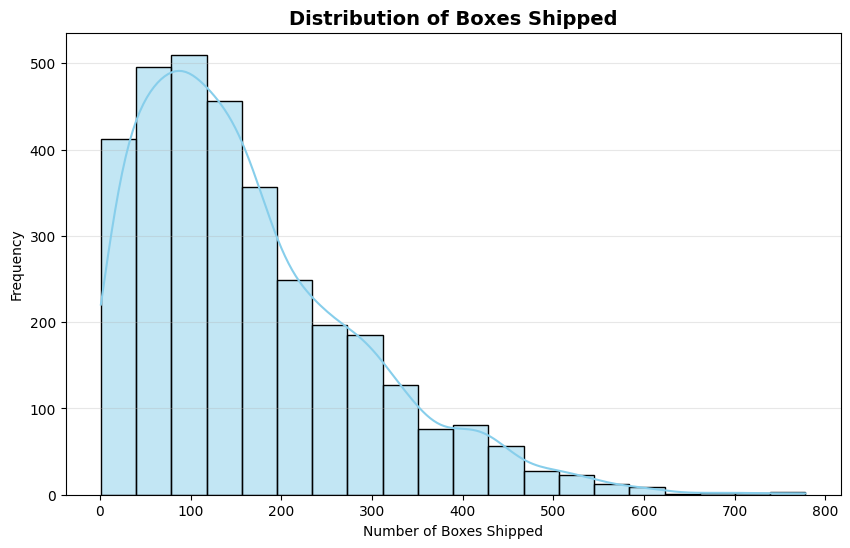

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Boxes Shipped'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Boxes Shipped", fontsize=14, fontweight='bold')
plt.xlabel("Number of Boxes Shipped")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()

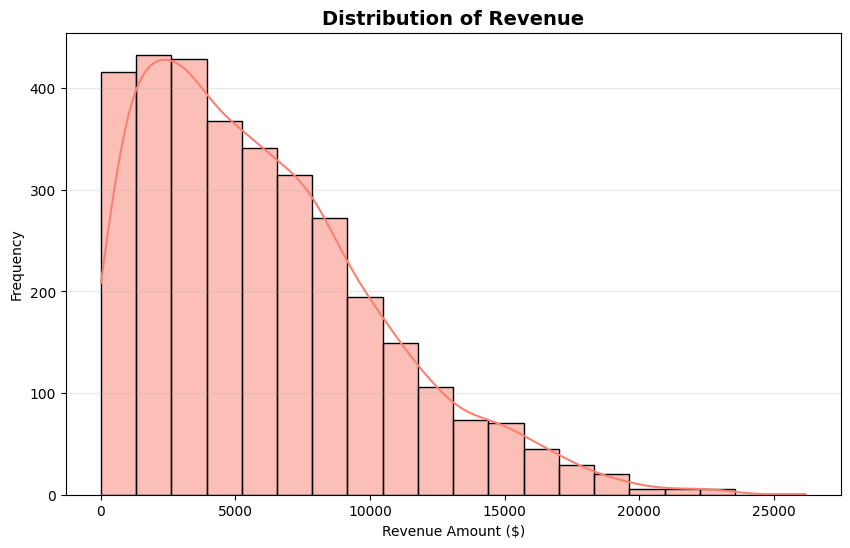

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=20, kde=True, color='salmon')
plt.title("Distribution of Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Revenue Amount ($)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()

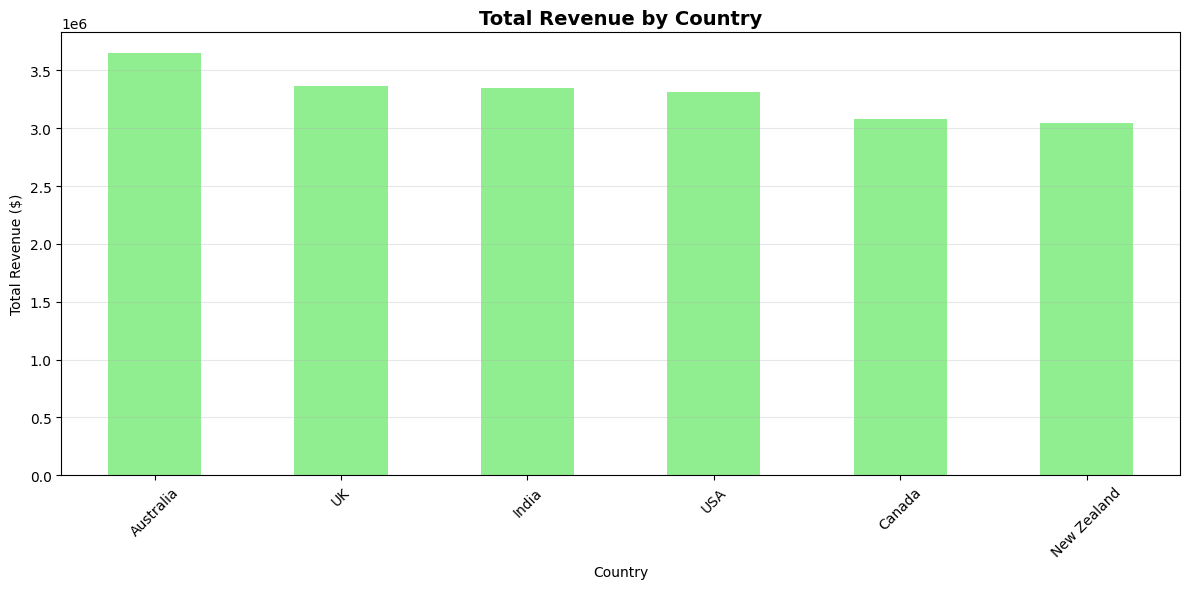


Revenue by Country:
Country
Australia      3646444.35
UK             3365388.90
India          3343730.83
USA            3313858.09
Canada         3078495.65
New Zealand    3043654.04
Name: Amount, dtype: float64


In [14]:
country_revenue = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_revenue.plot(kind='bar', color='lightgreen')
plt.title("Total Revenue by Country", fontsize=14, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nRevenue by Country:")
print(country_revenue)

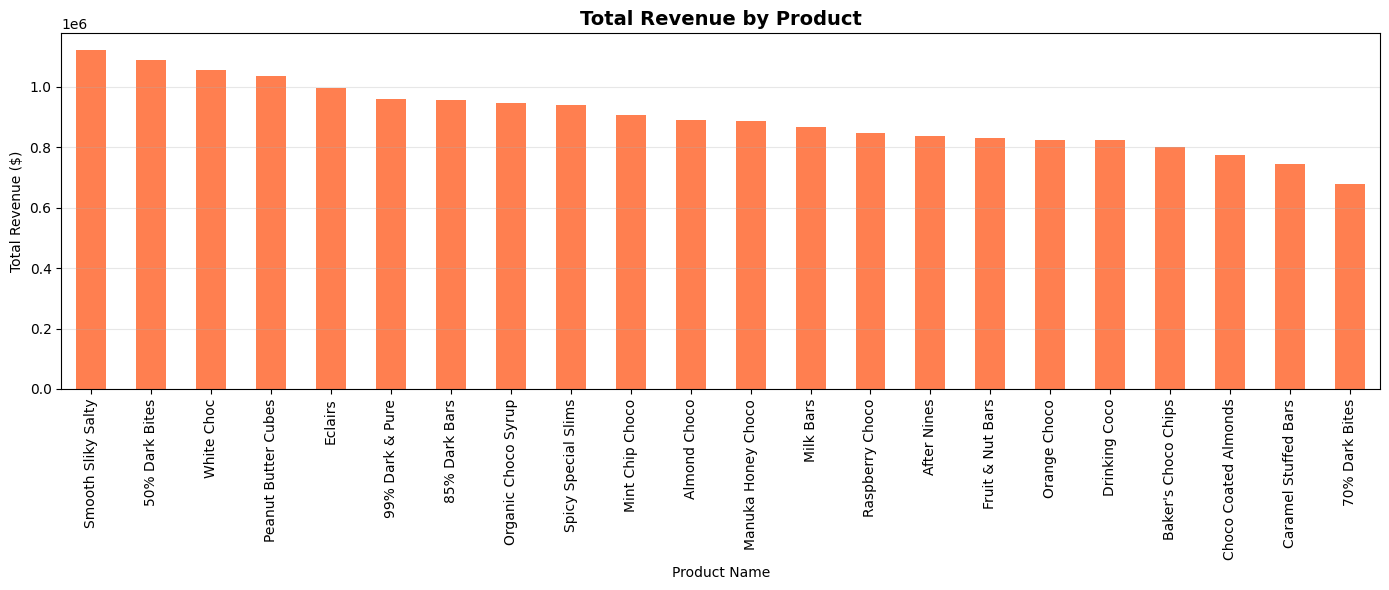


Revenue by Product:
Product
Smooth Sliky Salty      1120201.09
50% Dark Bites          1087659.35
White Choc              1054257.00
Peanut Butter Cubes     1036591.09
Eclairs                  996947.96
99% Dark & Pure          960033.45
85% Dark Bars            955268.24
Organic Choco Syrup      945345.73
Spicy Special Slims      938131.69
Mint Chip Choco          904989.55
Almond Choco             890454.65
Manuka Honey Choco       885208.03
Milk Bars                866273.62
Raspberry Choco          845388.41
After Nines              837215.67
Fruit & Nut Bars         829278.96
Orange Choco             824070.85
Drinking Coco            822245.57
Baker's Choco Chips      799085.67
Choco Coated Almonds     773062.91
Caramel Stuffed Bars     742516.15
70% Dark Bites           677346.22
Name: Amount, dtype: float64


In [15]:
product_revenue = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
product_revenue.plot(kind='bar', color='coral')
plt.title("Total Revenue by Product", fontsize=14, fontweight='bold')
plt.xlabel("Product Name")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nRevenue by Product:")
print(product_revenue)

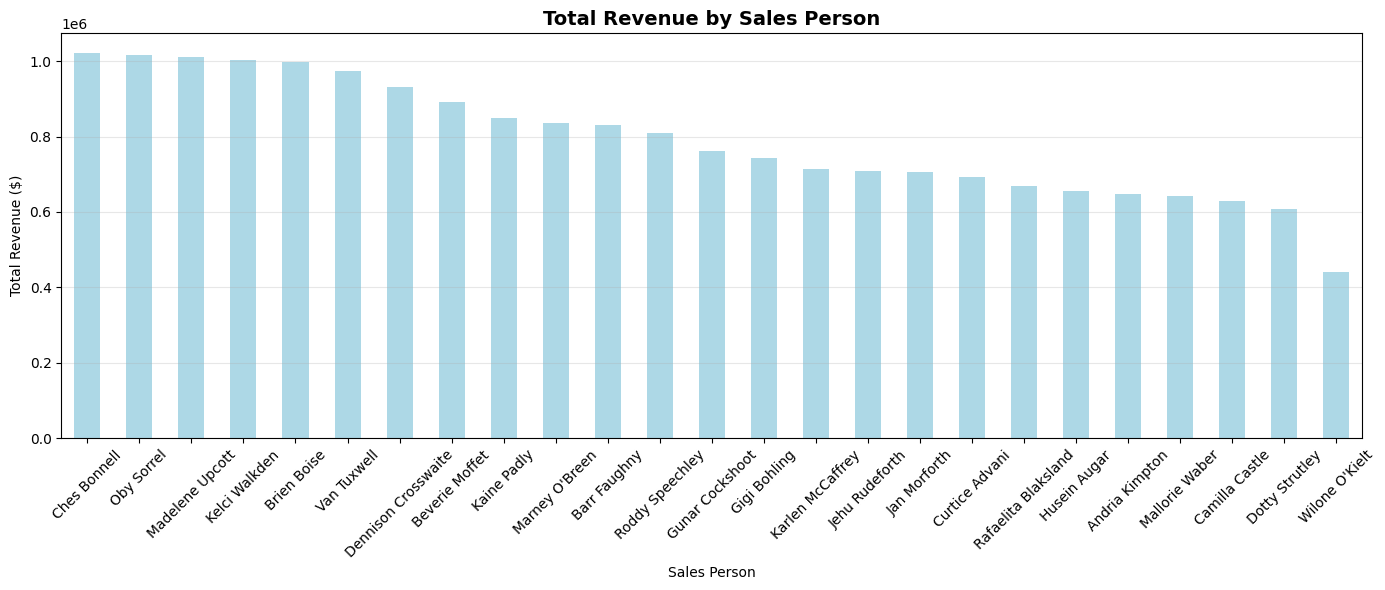


Top 10 Sales Employees by Revenue:
Sales Person
Ches Bonnell           1022599.96
Oby Sorrel             1017204.12
Madelene Upcott        1010028.72
Kelci Walkden          1002929.10
Brien Boise             997326.48
Van Tuxwell             974425.09
Dennison Crosswaite     931849.57
Beverie Moffet          892421.37
Kaine Padly             849062.76
Marney O'Breen          836427.63
Name: Amount, dtype: float64


In [16]:
salesperson_revenue = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
salesperson_revenue.plot(kind='bar', color='lightblue')
plt.title("Total Revenue by Sales Person", fontsize=14, fontweight='bold')
plt.xlabel("Sales Person")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 Sales Employees by Revenue:")
print(salesperson_revenue.head(10))

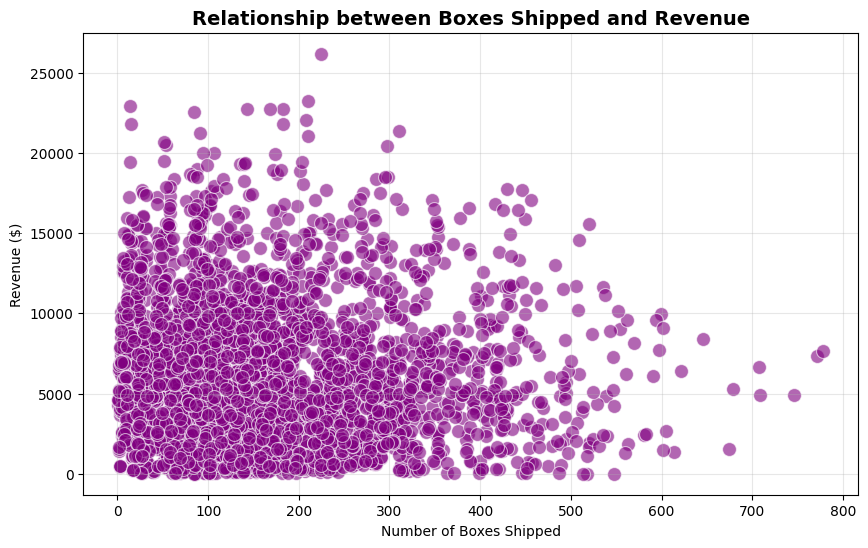

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Boxes Shipped', y='Amount', data=df, alpha=0.6, s=100, color='purple')
plt.title("Relationship between Boxes Shipped and Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Number of Boxes Shipped")
plt.ylabel("Revenue ($)")
plt.grid(alpha=0.3)
plt.show()

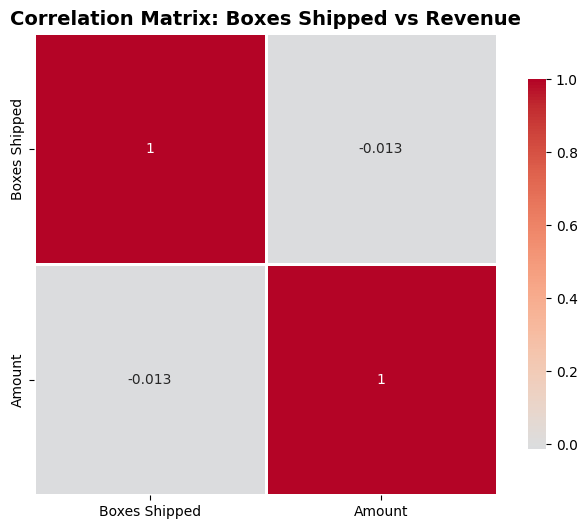


Correlation Matrix:
               Boxes Shipped    Amount
Boxes Shipped       1.000000 -0.013154
Amount             -0.013154  1.000000


In [17]:

correlation_matrix = df[['Boxes Shipped', 'Amount']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix: Boxes Shipped vs Revenue", fontsize=14, fontweight='bold')
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

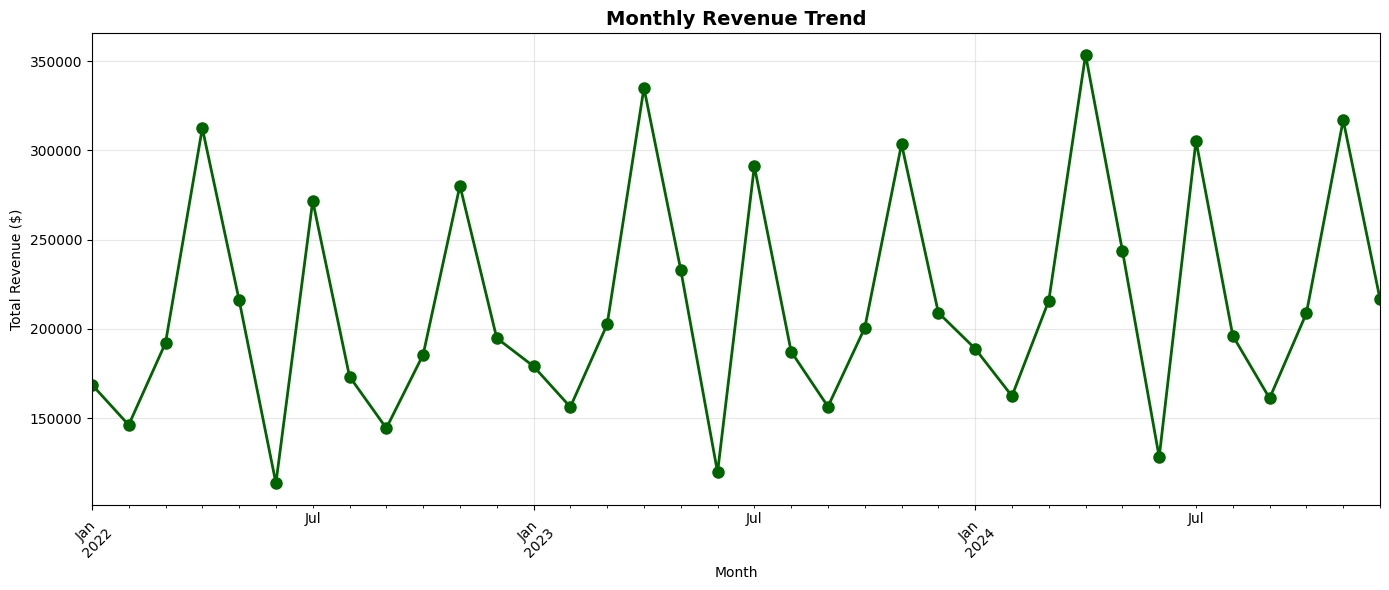


Monthly Revenue Trend:
Month
2022-01    168728.00
2022-02    146097.00
2022-03    192059.00
2022-04    312487.00
2022-05    216132.00
2022-06    113470.00
2022-07    271747.00
2022-08    173250.00
2022-09    144291.00
2022-10    185479.00
2022-11    280252.00
2022-12    194796.00
2023-01    178986.31
2023-02    156176.80
2023-03    202438.55
2023-04    335008.90
2023-05    233055.10
2023-06    119551.45
2023-07    291091.14
2023-08    187203.22
2023-09    156389.99
2023-10    200517.14
2023-11    303527.45
2023-12    209012.09
2024-01    188858.62
2024-02    162304.52
2024-03    215754.93
2024-04    353585.75
2024-05    243882.62
2024-06    128049.01
2024-07    305412.97
2024-08    196108.69
2024-09    161053.85
2024-10    208692.15
2024-11    317015.95
2024-12    216739.99
Freq: M, Name: Amount, dtype: float64


In [18]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(14, 6))
monthly_revenue.plot(kind='line', marker='o', linewidth=2, markersize=8, color='darkgreen')
plt.title("Monthly Revenue Trend", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nMonthly Revenue Trend:")
print(monthly_revenue)

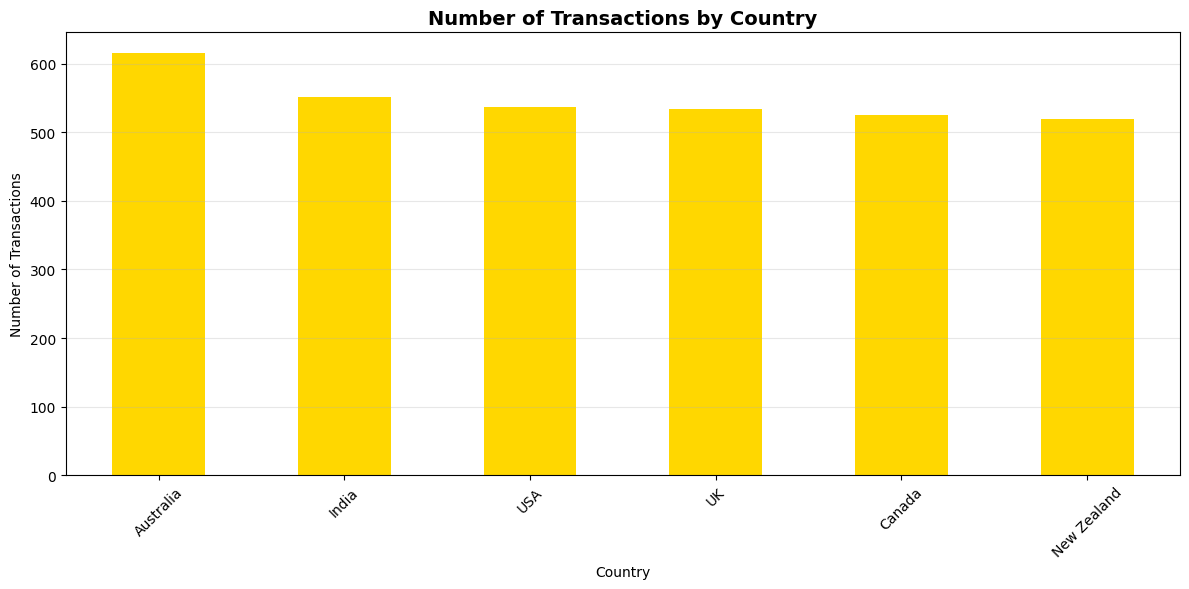


Transactions by Country:
Country
Australia      615
India          552
USA            537
UK             534
Canada         525
New Zealand    519
Name: count, dtype: int64


In [19]:
transactions_by_country = df['Country'].value_counts()

plt.figure(figsize=(12, 6))
transactions_by_country.plot(kind='bar', color='gold')
plt.title("Number of Transactions by Country", fontsize=14, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTransactions by Country:")
print(transactions_by_country)

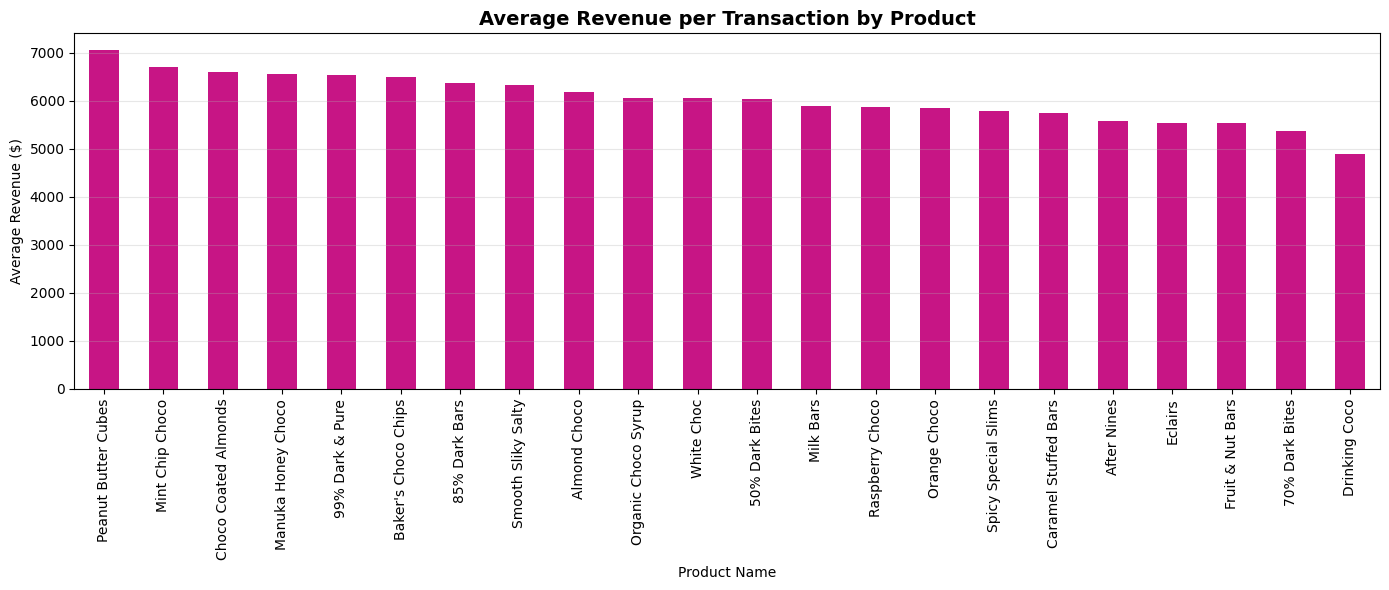


Average Revenue by Product:
Product
Peanut Butter Cubes     7051.640068
Mint Chip Choco         6703.626296
Choco Coated Almonds    6607.375299
Manuka Honey Choco      6557.096519
99% Dark & Pure         6530.839796
Baker's Choco Chips     6496.631463
85% Dark Bars           6368.454933
Smooth Sliky Salty      6328.819718
Almond Choco            6183.712847
Organic Choco Syrup     6059.908526
White Choc              6058.948276
50% Dark Bites          6042.551944
Milk Bars               5893.017823
Raspberry Choco         5870.752847
Orange Choco            5844.474113
Spicy Special Slims     5790.936358
Caramel Stuffed Bars    5755.939147
After Nines             5581.437800
Eclairs                 5538.599778
Fruit & Nut Bars        5528.526400
70% Dark Bites          5375.763651
Drinking Coco           4894.318869
Name: Amount, dtype: float64


In [21]:
avg_revenue_by_product = df.groupby('Product')['Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
avg_revenue_by_product.plot(kind='bar', color='mediumvioletred')
plt.title("Average Revenue per Transaction by Product", fontsize=14, fontweight='bold')
plt.xlabel("Product Name")
plt.ylabel("Average Revenue ($)")
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAverage Revenue by Product:")
print(avg_revenue_by_product)

In [22]:
print("=" * 80)
print("📊 Exploratory Data Analysis (EDA) Summary Statistics")
print("=" * 80)

print("\n1️⃣ General Statistics:")
print(f"   - Total Number of Transactions: {len(df)}")
print(f"   - Total Revenue: ${df['Amount'].sum():,.2f}")
print(f"   - Average Revenue per Transaction: ${df['Amount'].mean():,.2f}")
print(f"   - Maximum Transaction Value: ${df['Amount'].max():,.2f}")
print(f"   - Minimum Transaction Value: ${df['Amount'].min():,.2f}")

print("\n2️⃣ Top 3 Countries by Revenue:")
top_countries = df.groupby('Country')['Amount'].sum().nlargest(3)
for idx, (country, revenue) in enumerate(top_countries.items(), 1):
    print(f"   {idx}. {country}: ${revenue:,.2f}")

print("\n3️⃣ Top 3 Products by Revenue:")
top_products = df.groupby('Product')['Amount'].sum().nlargest(3)
for idx, (product, revenue) in enumerate(top_products.items(), 1):
    print(f"   {idx}. {product}: ${revenue:,.2f}")

print("\n4️⃣ Top 3 Salespersons by Revenue:")
top_salespersons = df.groupby('Sales Person')['Amount'].sum().nlargest(3)
for idx, (person, revenue) in enumerate(top_salespersons.items(), 1):
    print(f"   {idx}. {person}: ${revenue:,.2f}")

print("\n5️⃣ Correlation Between Units Shipped and Revenue:")
correlation = df['Boxes Shipped'].corr(df['Amount'])
print(f"   - Correlation Coefficient: {correlation:.4f}")
if correlation > 0.7:
    print("   - Interpretation: Very Strong Positive Correlation")
elif correlation > 0.4:
    print("   - Interpretation: Moderate Positive Correlation")
else:
    print("   - Interpretation: Weak or Negligible Correlation")

print("\n6️⃣ Peak Performance Month:")
best_month = monthly_revenue.idxmax()
best_month_revenue = monthly_revenue.max()
print(f"   - Month: {best_month}")
print(f"   - Revenue: ${best_month_revenue:,.2f}")

print("\n" + "=" * 80)

📊 Exploratory Data Analysis (EDA) Summary Statistics

1️⃣ General Statistics:
   - Total Number of Transactions: 3282
   - Total Revenue: $19,791,571.86
   - Average Revenue per Transaction: $6,030.34
   - Maximum Transaction Value: $26,170.95
   - Minimum Transaction Value: $7.00

2️⃣ Top 3 Countries by Revenue:
   1. Australia: $3,646,444.35
   2. UK: $3,365,388.90
   3. India: $3,343,730.83

3️⃣ Top 3 Products by Revenue:
   1. Smooth Sliky Salty: $1,120,201.09
   2. 50% Dark Bites: $1,087,659.35
   3. White Choc: $1,054,257.00

4️⃣ Top 3 Salespersons by Revenue:
   1. Ches Bonnell: $1,022,599.96
   2. Oby Sorrel: $1,017,204.12
   3. Madelene Upcott: $1,010,028.72

5️⃣ Correlation Between Units Shipped and Revenue:
   - Correlation Coefficient: -0.0132
   - Interpretation: Weak or Negligible Correlation

6️⃣ Peak Performance Month:
   - Month: 2024-04
   - Revenue: $353,585.75

